# Descritores de Imagens de Leihsmaniose

In [1]:
import glob
import numpy as np
import pandas as pd
from skimage.io import imread, imread_collection
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando as imagens da base
positivo = glob.glob('leishmaniose/Positivo/*.jpg')
negativo = glob.glob('leishmaniose/Negativo/*.jpg')

imagens_positivas = imread_collection(positivo)
imagens_negativas = imread_collection(negativo)

In [3]:
# 4 imagens aleatórias
imagens = imagens_positivas[10], imagens_positivas[9], imagens_negativas[0], imagens_negativas[4]

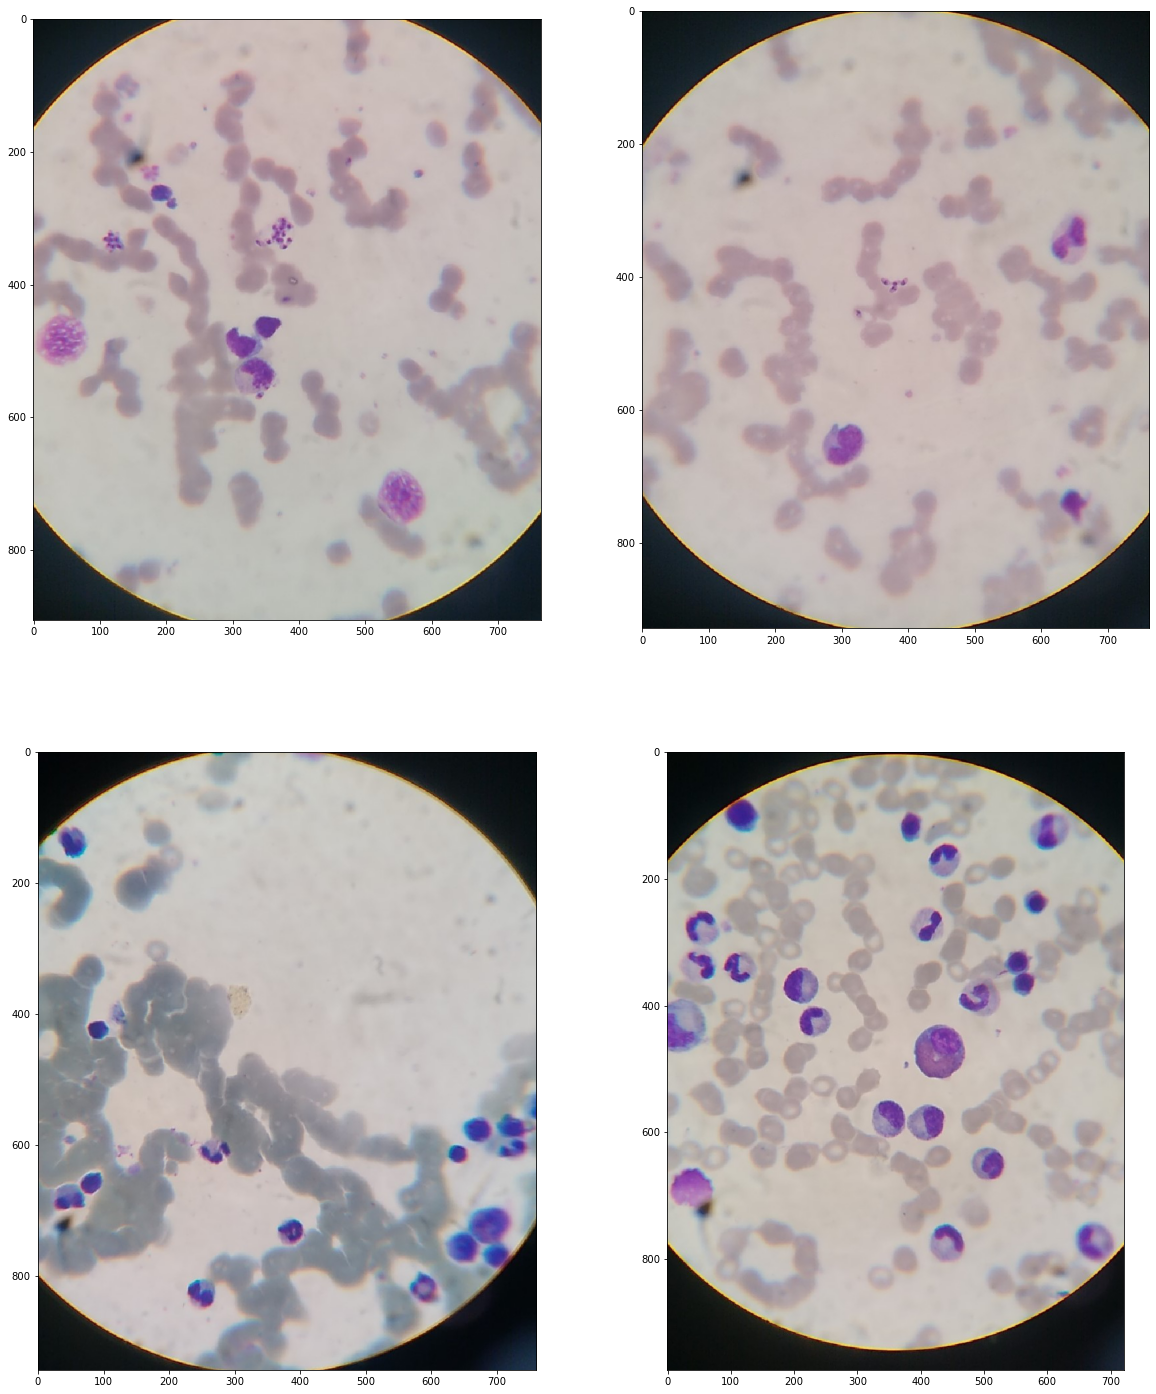

In [4]:
def exibe_imagens(imgs):
    fig, ax = plt.subplots(2, 2, figsize=(20, 25))
    ax = ax.ravel()

    for i in range(len(imgs)):
        ax[i].imshow(imgs[i], cmap="gray")
        
exibe_imagens(imagens)

# 1. Descritor GLCM

(-0.5, 600.5, 400.5, -0.5)

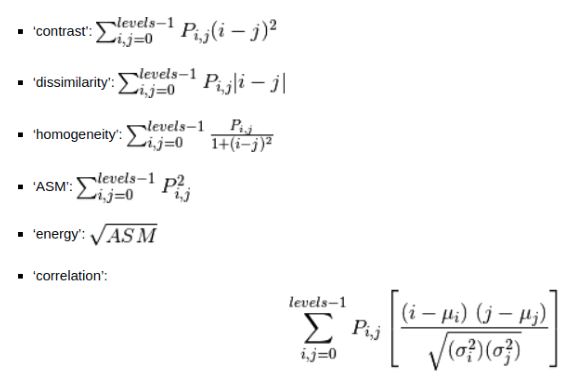

In [5]:
imagem_glcm = imread('GLCM.png')
plt.figure(figsize=(10,10))
plt.imshow(imagem_glcm)
plt.axis('off')

* Contraste: Mede as variações locais na matriz de coocorrência de níveis de cinza.
* Correlação: Mede a ocorrência de probabilidade conjunta dos pares de pixels especificados.
* Energia: Fornece a soma dos elementos quadrados no GLCM. Também conhecido como uniformidade ou segundo momento angular.
* Homogeneidade: Mede a proximidade da distribuição dos elementos no GLCM à diagonal do GLCM.

In [6]:
from skimage.feature import greycomatrix, greycoprops


# Extrai características com o GLCM
def extrai_caracteristicas_glcm(imagens, label, features_glcm):
    
    for imagem in imagens:
        
        
        # Imagem em escala de cinza
        imagem_cinza = np.uint8(rgb2gray(imagem)*255)

        
        # Extrator GLCM
        glcm = greycomatrix(imagem_cinza,                 # Imgem cinza
                            [1],                          # Distância 1 pixel (leishmania pequena)
                            [0],                          # ângulo de 0º --> pega o pixel da direita
                            levels=imagem_cinza.max()+1,  # indica os níveis de cinza da imagem
                            normed=False,                 # normaliza os dados da matriz de saída (padrão False)
                            symmetric=False)              # a matriz de saída será simétrica (padrão False)

        
        # Extraindo características do GLCM
        nova_linha = {'label':label, 
                      'contrast':greycoprops(glcm, 'contrast')[0][0], 
                      'dissimilarity':greycoprops(glcm, 'dissimilarity')[0][0],
                      'homogeneity':greycoprops(glcm, 'homogeneity')[0][0],
                      'ASM':greycoprops(glcm, 'ASM')[0][0],
                      'energy':greycoprops(glcm, 'energy')[0][0],
                      'correlation':greycoprops(glcm, 'correlation')[0][0]
                     }
        
        
        
        # print("%s - %s" %(i, nova_linha))
        features_glcm = features_glcm.append(nova_linha, ignore_index=True)
        
    return features_glcm

In [7]:
features_glcm = pd.DataFrame(columns=['label', 
                                  'contrast', 
                                  'dissimilarity', 
                                  'homogeneity', 
                                  'ASM', 
                                  'energy', 
                                  'correlation'
                                 ])

features_glcm = extrai_caracteristicas_glcm(imagens_positivas, "Positivo", features_glcm) # Positivas
features_glcm = extrai_caracteristicas_glcm(imagens_negativas, "Negativo", features_glcm) # Negativas

In [8]:
# Dataframe
features_glcm

,label,contrast,dissimilarity,homogeneity,ASM,energy,correlation
0,Positivo,19.978835,1.047056,0.708499,0.015476,0.124402,0.997078
1,Positivo,1.607938,0.590092,0.761266,0.017451,0.132101,0.997181
2,Positivo,2.227787,0.813893,0.685785,0.007864,0.088680,0.996144
3,Positivo,14.200068,0.890754,0.747463,0.019388,0.139239,0.997277
4,Positivo,12.670365,0.721091,0.799169,0.035446,0.188270,0.997486
...,...,...,...,...,...,...,...
146,Negativo,10.821469,0.952147,0.724889,0.006331,0.079567,0.998186
147,Negativo,14.959136,1.034289,0.726346,0.019225,0.138656,0.997221
148,Negativo,4.458091,0.812485,0.731733,0.013581,0.116539,0.998972
149,Negativo,4.909513,1.024656,0.677170,0.006730,0.082037,0.998892


Text(0, 0.5, 'GLCM Homogeneity')

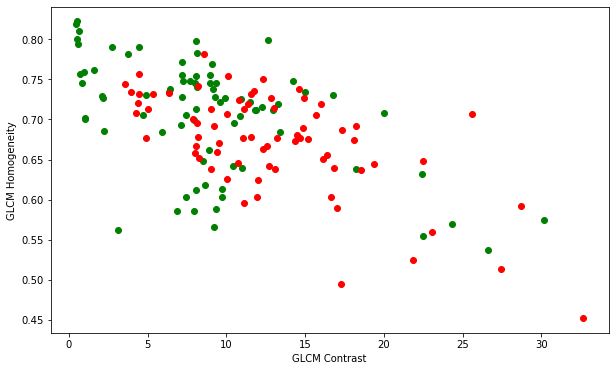

In [11]:
features = {1:'GLCM Contrast', 
            2:'GLCM Dissimilarity', 
            3:'GLCM Homogeneity', 
            4:'GLCM ASM', 
            5:'GLCM Energy', 
            6:'GLCM Correlation'}

# Escolha dos parâmetros
feature_x = 1
feature_y = 3

x_positivo = features_glcm[features_glcm['label'] == 'Positivo'].iloc[:,feature_x]
y_positivo = features_glcm[features_glcm['label'] == 'Positivo'].iloc[:,feature_y]

x_negativo = features_glcm[features_glcm['label'] == 'Negativo'].iloc[:,feature_x]
y_negativo = features_glcm[features_glcm['label'] == 'Negativo'].iloc[:,feature_y]


# Gráfico
plt.figure(figsize=(10,6))

plt.plot(x_positivo, y_positivo, 'go') # Gray = Positivo
plt.plot(x_negativo, y_negativo, 'ro') # Red = Negativo

plt.xlabel(features.get(feature_x))
plt.ylabel(features.get(feature_y))

Text(0.5, 0, 'GLCM Homogeneity')

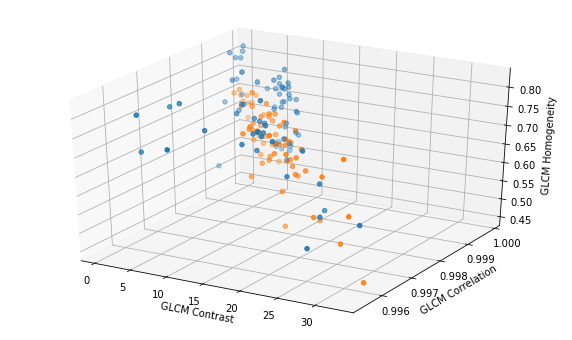

In [10]:
# Escolha dos parâmetros
feature_x = 1
feature_y = 6
feature_z = 3

x_positivo = features_glcm[features_glcm['label'] == 'Positivo'].iloc[:,feature_x]
y_positivo = features_glcm[features_glcm['label'] == 'Positivo'].iloc[:,feature_y]
z_positivo = features_glcm[features_glcm['label'] == 'Positivo'].iloc[:,feature_z]

x_negativo = features_glcm[features_glcm['label'] == 'Negativo'].iloc[:,feature_x]
y_negativo = features_glcm[features_glcm['label'] == 'Negativo'].iloc[:,feature_y]
z_negativo = features_glcm[features_glcm['label'] == 'Negativo'].iloc[:,feature_z]


# Gráfico
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_positivo, y_positivo, z_positivo)
ax.scatter(x_negativo, y_negativo, z_negativo)

ax.set_xlabel(features.get(feature_x))
ax.set_ylabel(features.get(feature_y))
ax.set_zlabel(features.get(feature_z))